# PyTorch Workflow

1. Get data ready (turn into tensors)
2. Build or pick a pretrained model (to suit your problem)
    * 2.1 Pick a loss function & optimizer
    * 2.2 Build a training loop
3. Fit the model to the data and make a prediction
4. Evaluate the model.
5. Improve through expermentation
6. Save and reload your trained model

In [2014]:
import torch 
import torch.nn as nn ## nn is baisc building block of graphs - computational graphs ,

import matplotlib.pyplot as plt

In [2015]:
torch.__version__

'2.9.1+cu126'

## 1. Data (Preparing and loading)

Data can be alomost anything when it comes to ML (image , text ,video etc)

1. Get data into numerical representation 
2. Build a model to learn patterend in  that numerical representation

To showcase this , let's create some *known* data using the linear regression formula.

`Y = a + bX` - Linear regression

In [2016]:
# create known parameters 

weight = 0.7 # b
bias = 0.3 # a

# create data 

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # linear regression formula

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [2017]:
len(X), len(y)

(50, 50)

## Spliting data inot traning and test sets (one of the most important concepts in ML in general)

Three Datasets (Most important concept in ML)
1. training set - (60 -80 %) -> always
2. validation set - (10 -20%) -> not always
3. test set - (10 -20 %) -> always

Generalization : the ability for a machine learning model perfrom well on data it hasn't seen before

In [2018]:
# Creating train and test sets

train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize Our Data

In [2019]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='blue', label='Training data')
    # Plot test data in green
    plt.scatter(test_data, test_labels, c='green', label='Testing data')
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c='red', label='Predictions')
        
    plt.legend(prop={"size": 14})

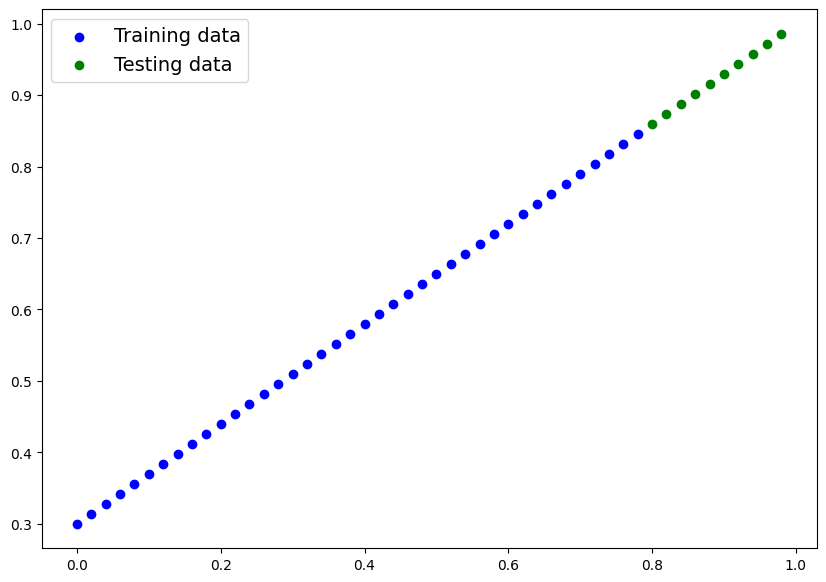

In [2020]:
plot_predictions()

## Building PyTorch model

* What our model does 

`Start with random values weights and bias -> Look at  training data and adjust the random values ( the weights and bias values we used to create the data )`

How it does it ?

1. Gradient descent 
2. Backpropagation

In [2021]:
# Linear Regression Model in PyTorch Y = a + bX

class LinerRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

 #### PyTorch Model Building Essentials

1. Subclass nn.Module (almost all models in PyTorch are subclass of nn.Module)
2. Create 2 methods : 
    * __init__() : to define layers and connect them to the model
    * forward() : to define the forward pass ( how the model transforms data from the input to the output)
3. nn.Parameter : What parameters should our model try and learn , often PyTorch layer from torch.nn will set these for us 

4. torch.nn.module : The base class for all the neural network modules 

5. torch.optim : Optimizer will update our model parameters to try and reduce the loss (Parameter : weights and bias )
    

In [2022]:
torch.manual_seed(42)

# create an instance of the model 

model_0 = LinerRegressionModel()

list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [2023]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [2024]:
# The closer the values are to the actual values , the better the model is 
weight , bias

(0.7, 0.3)

In [2025]:
## making prediction using ` torch.inference_mode()`

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds , y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))


`torch.inference_mode()` : turns off gradient tracking and reduces memory usage 

`torch.no_grad()` : turns off gradient tracking and reduces memory usage 



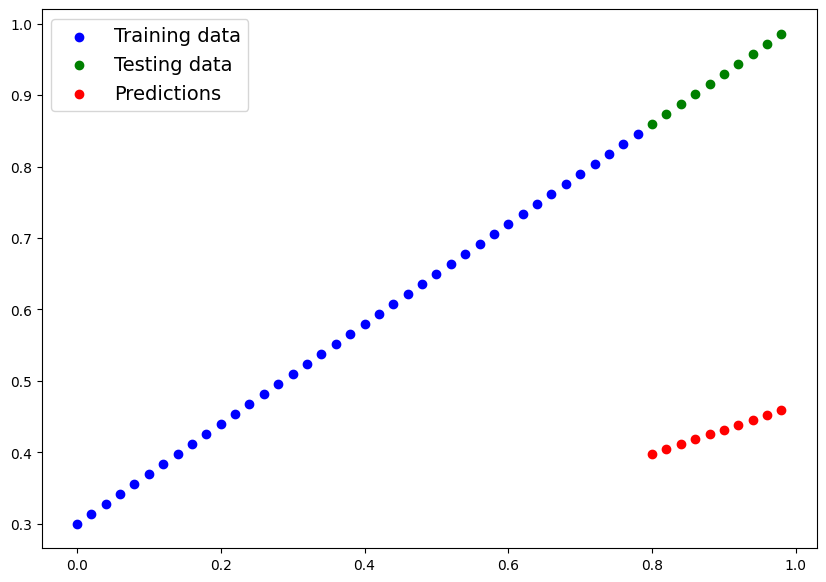

In [2026]:
# visualize the prediction 

plot_predictions(predictions=y_preds)


## Training model
* Loss function : Measures how wrong your model is (in regession task , common loss fucntions : nn.L1Loss and nn.MSELoss)
* Optimizer : Adjust the parameters to reduce the loss 

In [2027]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [2028]:
# Setup the loss function 
loss_fn = nn.L1Loss()

# Setup the optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(),
                                                 lr=0.01) # learning rate 



## Building a training loop 

1. Loop through the data 
2. Forward pass (model makes predictions)
3. Calculate the loss 
4. Optimizer zero grad 
5. Loss backward (backpropagation)
6. Optimizer step (update the parameters)

 

In [2029]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 168

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE

In [2030]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6947])), ('bias', tensor([0.3028]))])

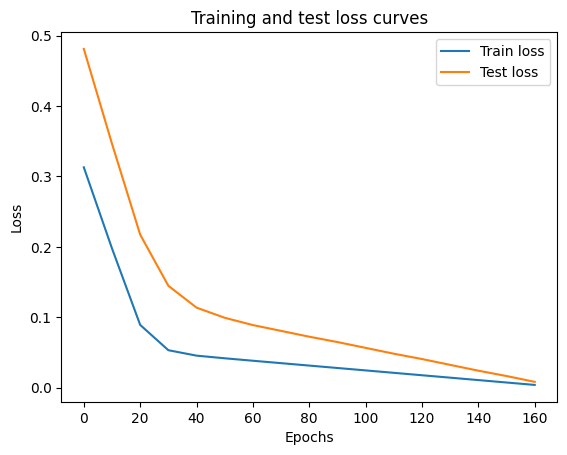

In [2031]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

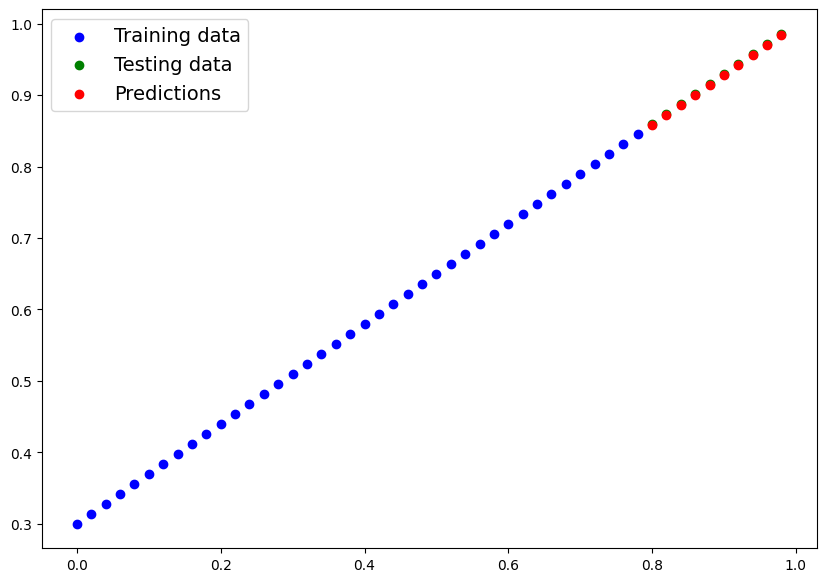

In [2032]:
plot_predictions(predictions=test_pred);

## Saving a model in PyTorch

There are three main methods to save and load the model in pytorch

1. `torch.save()` - allows you save a PyTorch object in python;s pickle format

2. `torch.load()` - allows you load a saved PyTorch object 

3. `torch.nn.Module.load_state_dict()` - allow you to load a model's saved state dictionary

In [2033]:
# save pytorch model 

from pathlib import Path

# 1. create model's directory

MODEL_PATH = Path("../models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

# 2. Create model save path

MODEL_NAME = "O1_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(),
                        f=MODEL_SAVE_PATH)

## Loading a PyTorch model

Since we save our model's `state_dict()` rather the entire model , we'll create a new instance of our model class and `state_dict()` into that

In [2034]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6947])), ('bias', tensor([0.3028]))])

In [2035]:
# Load the saved state_dict we have to instantiate a new instance of our model class 

loaded_model_0 = LinerRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance witht update params)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [2036]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6947])), ('bias', tensor([0.3028]))])

In [2037]:
# Make some prediction 

loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8586],
        [0.8725],
        [0.8864],
        [0.9003],
        [0.9142],
        [0.9281],
        [0.9420],
        [0.9559],
        [0.9698],
        [0.9837]])

In [2041]:
# compare loaded model preds witht original model preds 

model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])